In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import optimize
%matplotlib inline


We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below. Task:

fitting it to the periodic function
plot the fit Data Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25  Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

Text(0, 0.5, 'Min and max temperature')

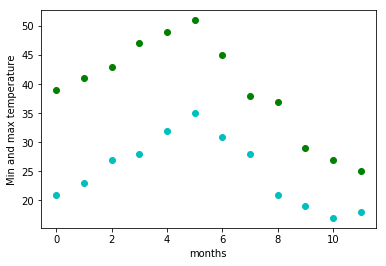

In [23]:
T_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
T_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
M = np.arange(12)
plt.plot(M, T_max, 'go')
plt.plot(M, T_min, 'co')
plt.xlabel('months')
plt.ylabel('Min and max temperature')


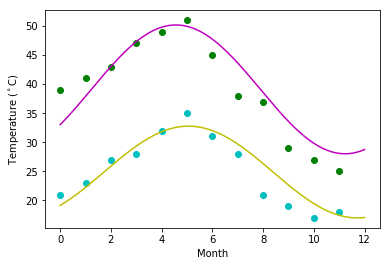

In [24]:
def periodic_fun(x,avg,ampl,offset):
    return (avg+ ampl * np.cos(((x+offset)*1.8*np.pi/x.max())))
res_max, cov_max = optimize.curve_fit(periodic_fun, M,T_max,[40,51,0])
res_min, cov_min = optimize.curve_fit(periodic_fun, M,T_min,[25,35,0])
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(M, T_max, 'go')
plt.plot(days, periodic_fun(days, *res_max), 'm-')
plt.plot(M, T_min, 'co')
plt.plot(days, periodic_fun(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()

This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [137]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

In [139]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


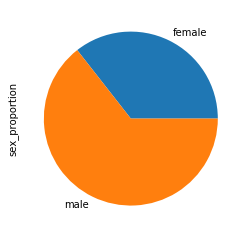

In [140]:
ts = df['sex']
a = list(ts)
b = []

for i in a:
    if i == 'female':
        b.append(i)
dic = {'sex_proportion': [len(b), len(a)-len(b)]}

df1= pd.DataFrame(dic, index=['female','male'])
df1['sex_proportion'].plot(kind ='pie')

In [141]:
df['sex'][df['sex'] == 'female'] = 0.5
df['sex'][df['sex'] == 'male'] = 1.0
df.head()      
       
    

C:\Users\Satvik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Satvik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0.5,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",1,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",0.5,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.5,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Text(0, 0.5, 'Age')

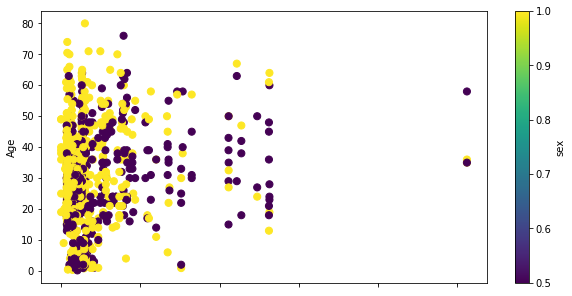

In [155]:
ax = df.plot.scatter( figsize = (10,5), x= 'fare', y = 'age', c ='sex', s= 50, cmap = 'viridis')
ax.set_xlabel('Fair paid')
ax.set_ylabel('Age')